# ****HR Analytics: Job Change Prediction****


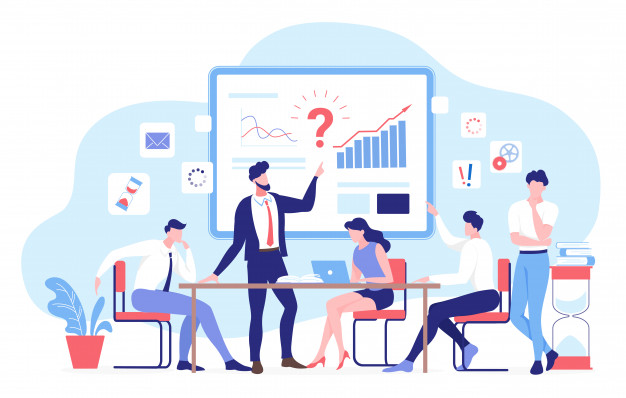


* Predict who will move to a new job

* A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because **it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates**.Information related to demographics, education, experience are in hands from candidates signup and enrollment.

* This dataset designed to understand the factors that lead a person to leave current job for HR researches too.

* Note:

  -> The dataset is imbalanced.

  -> Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality (High cardinality means that categorical features have a large number of unique values.).

  -> Missing values are also present.

* Features:

    * enrollee_id : Unique ID for candidate

    * city: City code

    * city_ development _index : Developement index of the city (scaled)

    * gender: Gender of candidate

    * relevent_experience: Relevant experience of candidate

    * enrolled_university: Type of University course enrolled if any

    * education_level: Education level of candidate

    * major_discipline :Education major discipline of candidate

    * experience: Candidate total experience in years

    * company_size: No of employees in current employer's company

    * company_type : Type of current employer

    * last_new_job: Difference in years between previous job and current job

    * training_hours: training hours completed

    * target: 0 ->Not looking for job change, 1 -> Looking for a job change


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
hr=pd.read_csv('/content/aug_train.csv')
hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
hr.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [ ]:
hr.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
hr.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
hr.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

*  There are 19157 rows and 14 columns
* In the dataset we have the columns: gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job have nulls in them
* There are two int columns (enrollee_id and training_hours) and two float columns (city_development_index and target)the remaining 10 columns are of object type


In [ ]:
hr.duplicated().sum()

0

* In this data set there is no duplicate values

In [ ]:
hr.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

* Here we have too many unique values in enrollee_id and city so we drop it later

* Description about numerical columns

In [ ]:
hr.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


* Description about categorical columns

In [ ]:
hr.describe(include='O')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


* Now we are going to fill the missing values before plotting graphs

In [ ]:
for i in hr.columns:
  if hr[i].dtype=='object':
    hr[i]=hr[i].fillna(hr[i].mode()[0])
  else:
    hr[i]=hr[i].fillna(hr[i].mean())
hr.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

**Exploratory Data Analysis (EDA)**

 * It is an analysis approach that identifies general patterns in the data

In [ ]:
ge=hr['gender'].value_counts()
ge

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

* 'plotly.express' is a high-level data visualization library in Python that is part of the Plotly library ecosystem

In [ ]:
px.bar(x=ge.index,y=ge,labels={'y':'Count','x':'Gender'},title='Gender Distribution',width=500,color=ge.index)


<Axes: title={'center': 'Gender Distribution by Target'}, xlabel='gender', ylabel='count'>

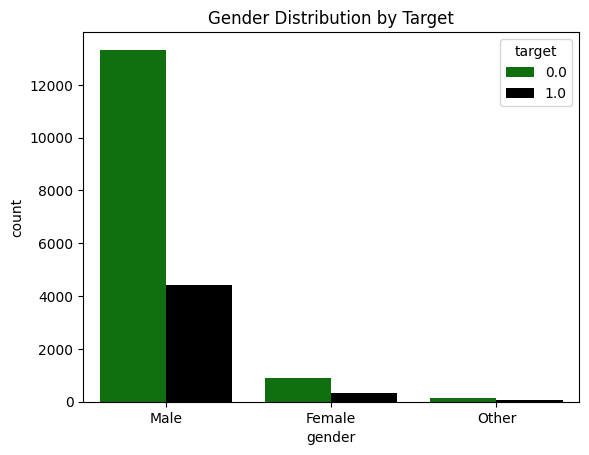

In [ ]:
plt.title('Gender Distribution by Target')
sns.countplot(x=hr['gender'],hue=hr['target'],palette=['g','k'])

* Here green colour indicate those who not want a job change and black is looking for job change

In [ ]:
re=hr['relevent_experience'].value_counts()
re

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [ ]:
px.bar(x=re.index,y=re,labels={'y':'Count','x':'Relevent_Experience'},width=600,color=re.index,title='Relevent_Experience Distribution')

<Axes: title={'center': 'Relevent_Experience Distribution by Target'}, xlabel='relevent_experience', ylabel='count'>

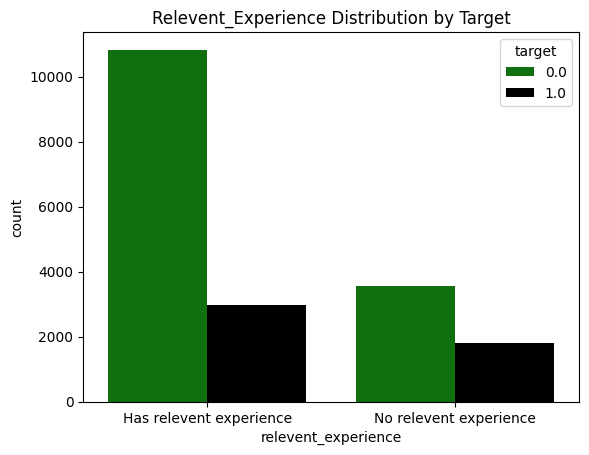

In [ ]:
plt.title('Relevent_Experience Distribution by Target')
sns.countplot(x=hr['relevent_experience'],hue=hr['target'],palette=['g','k'])

In [ ]:
eu=hr['enrolled_university'].value_counts()
eu

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [ ]:
px.bar(x=eu.index,y=eu,labels={'x':'Enrolled_university','y':'Count'},width=650,color=eu.index,title='Enrolled University Distribution')

<Axes: title={'center': 'Enrolled University Distribution by Target'}, xlabel='enrolled_university', ylabel='count'>

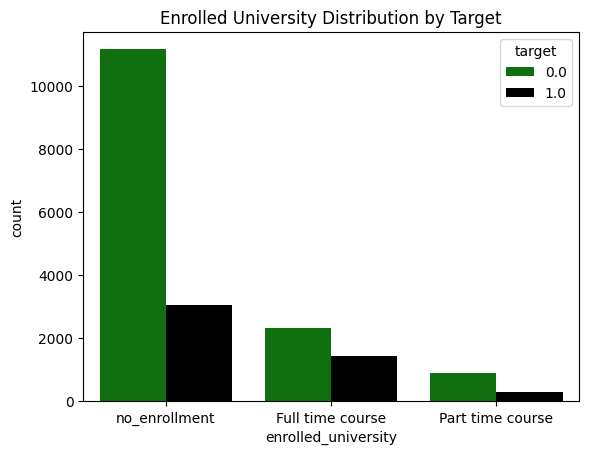

In [ ]:
plt.title('Enrolled University Distribution by Target')
sns.countplot(x=hr['enrolled_university'],palette=['g','k'],hue=hr['target'])

In [ ]:
el=hr['education_level'].value_counts()
el

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [ ]:
px.pie(names=el.index,values=el,title='Education_level Distribution')

<Axes: title={'center': 'Education_level Distribution by Target'}, xlabel='education_level', ylabel='count'>

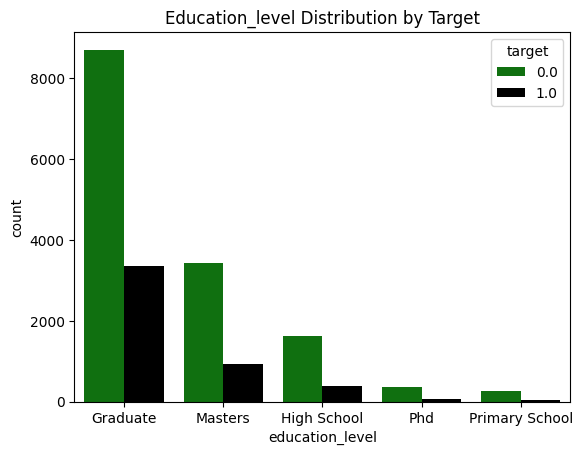

In [ ]:
plt.title('Education_level Distribution by Target')
sns.countplot(x=hr['education_level'],palette=['g','k'],hue=hr['target'])

* Here the education is ordinal.So we replace lower education to higer (0 to 4)

In [ ]:
hr['education_level']=hr['education_level'].map({'Primary School':0,'High School':1,'Graduate':2,'Masters':3,'Phd':4})

In [ ]:
md=hr['major_discipline'].value_counts()
md

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [ ]:
px.bar(y=md.index,x=md,title='Major_discipline Distribution',labels={'x':'Count','y':'Major_discipline'},color=md.index)

<Axes: title={'center': 'Major_discipline Distribution by Target'}, xlabel='count', ylabel='major_discipline'>

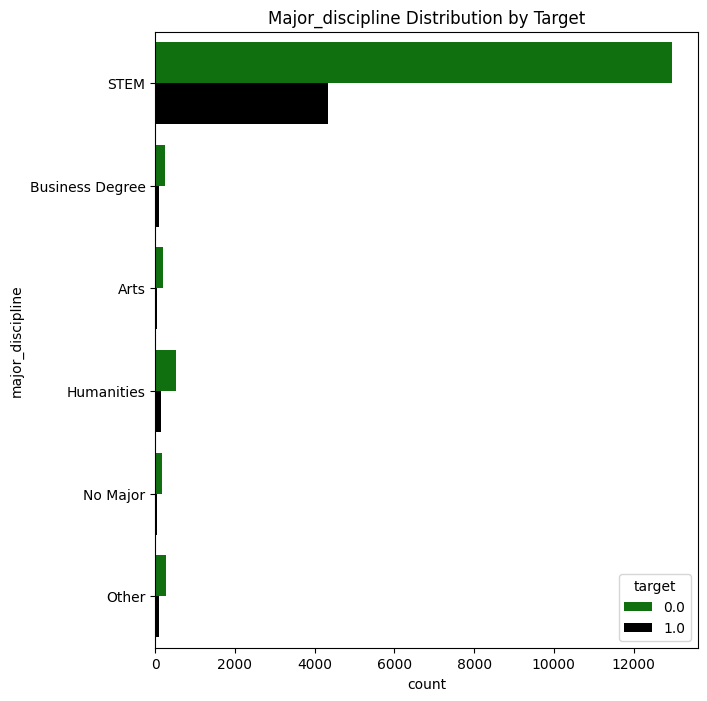

In [ ]:
plt.figure(figsize=(7,8))
plt.title('Major_discipline Distribution by Target')
sns.countplot(y=hr['major_discipline'],palette=['g','k'],hue=hr['target'])

In [ ]:
ep=hr['experience'].value_counts()
ep

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

* Here we have '>20' and  '<1' so we need to remove it and change the data type to float.

In [ ]:
px.pie(hr,names=ep.index,values=ep,title='Exprience Distribution')

In [ ]:
hr['experience']=hr['experience'].replace('<1','0')
hr['experience']=hr['experience'].replace('>20','21')
hr['experience']=hr['experience'].astype(float)


<Axes: title={'center': 'Experience Distribution by Target'}, xlabel='count', ylabel='experience'>

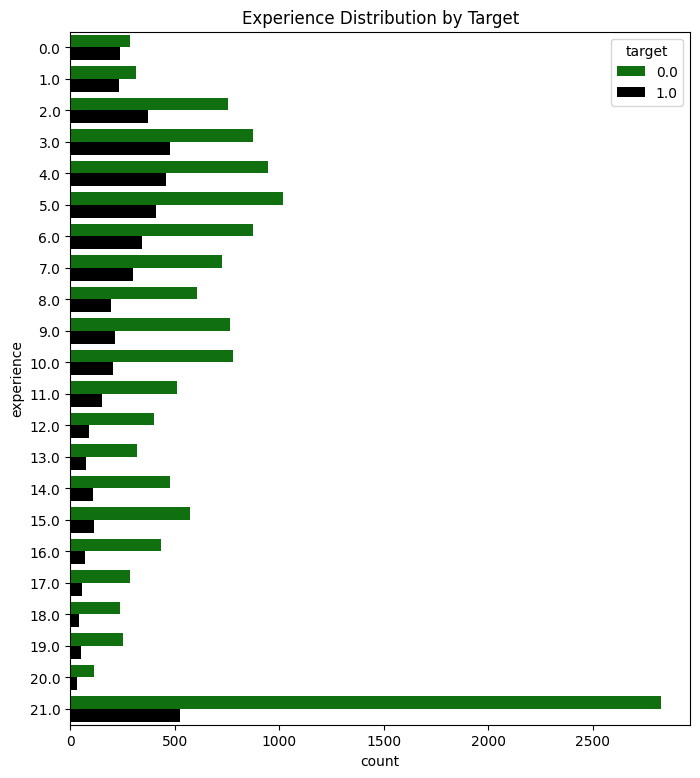

In [ ]:
plt.figure(figsize=(8,9))
plt.title('Experience Distribution by Target')
sns.countplot(y=hr['experience'],palette=['g','k'],hue=hr['target'])

In [ ]:
cs=hr['company_size'].value_counts()
cs

50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [ ]:
px.bar(x=cs.index,y=cs,labels={'x':'Company_size','y':'Count'},color=cs,title='Company_size Distribution')

<Axes: title={'center': 'Company_size Distribution by Target'}, xlabel='company_size', ylabel='count'>

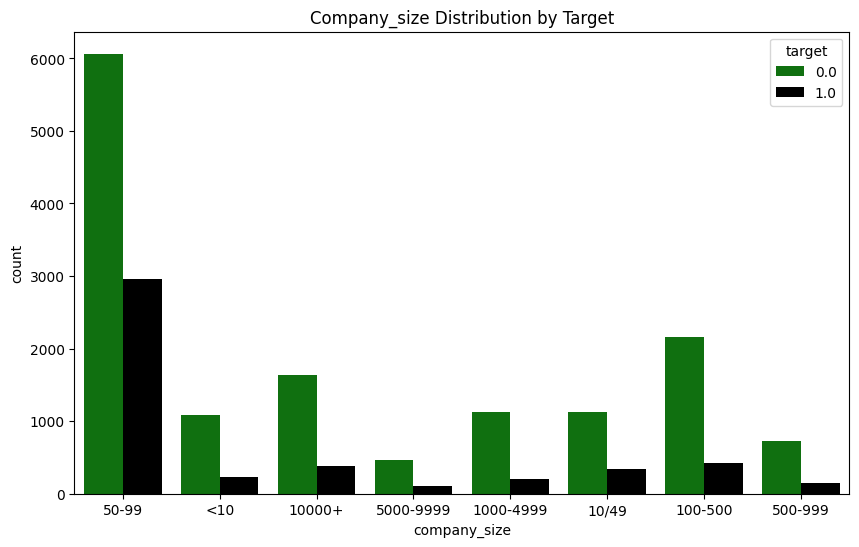

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Company_size Distribution by Target')
sns.countplot(x=hr['company_size'],palette=['g','k'],hue=hr['target'])

* Here the data is in object form so we need to convert it into int so we are going to take its mean.

In [ ]:
hr['company_size']=hr['company_size'].map({'50-99':(50+99)//2,'100-500':(100+500)//2,'10000+':10000,'10/49':(10+49)//2,'1000-4999':(1000+4999)//2,'<10':9,'500-999':(500+999)//2,'5000-9999':(5000+9999)//2})

In [ ]:
# hr['company_size'].value_counts()

In [ ]:
ct=hr['company_type'].value_counts()
ct

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

In [ ]:
px.pie(names=ct.index,values=ct,title='Company_type Distribution')

<Axes: title={'center': 'Company_type Distribution by Target'}, xlabel='company_type', ylabel='count'>

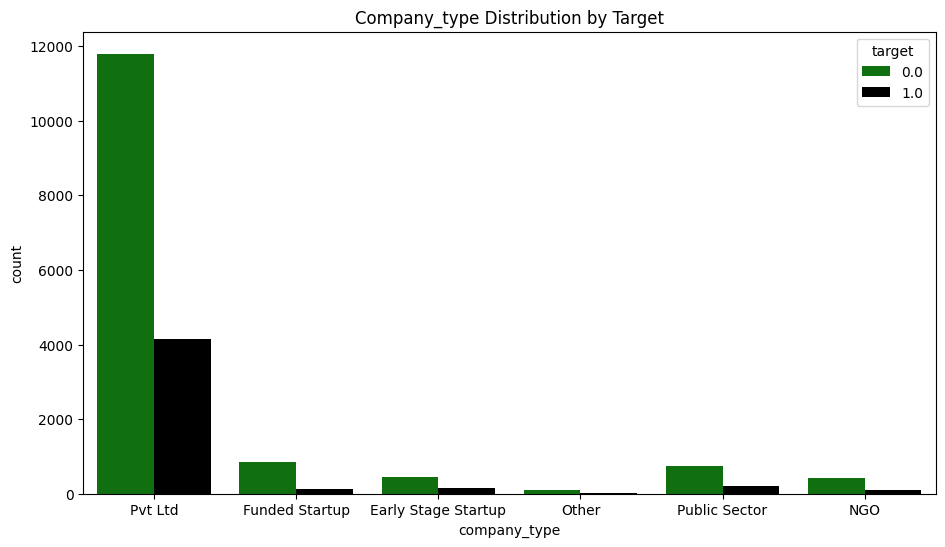

In [ ]:
plt.figure(figsize=(11,6))
plt.title('Company_type Distribution by Target')
sns.countplot(x=hr['company_type'],palette=['g','k'],hue=hr['target'])

In [ ]:
lj=hr['last_new_job'].value_counts()
lj

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

* all the values other than '>4' & 'never' is int.so we change these two

In [ ]:
px.bar(x=lj,y=lj.index,labels={'x':'Count','y':'Last_new_job'},title='Last_new job Distribution',color=lj)

In [ ]:
hr['last_new_job']=hr['last_new_job'].replace('>4','5')
hr['last_new_job']=hr['last_new_job'].replace('never','0')
hr['last_new_job']=hr['last_new_job'].astype(float)


<Axes: title={'center': 'last new job Distribution by Target'}, xlabel='last_new_job', ylabel='count'>

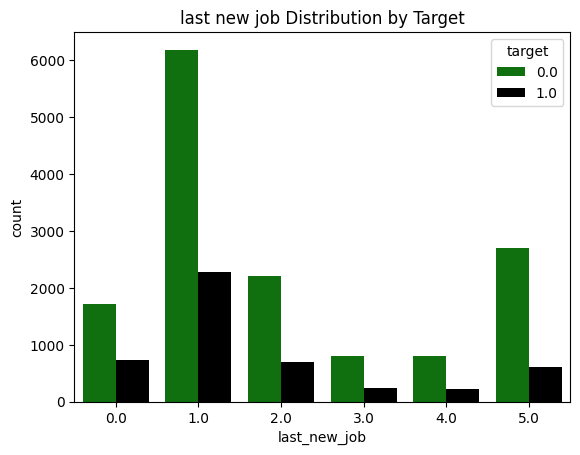

In [ ]:
plt.title('last new job Distribution by Target')
sns.countplot(x=hr['last_new_job'],palette=['g','k'],hue=hr['target'])

In [ ]:
cy=hr['city'].value_counts()
cy

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [ ]:
px.bar(x=cy.index,y=cy,title='City Distribution',labels={'x':'City','y':'Count'})

In [ ]:
# plt.figure(figsize=(11,6))
# sns.countplot(x=hr['city'],palette=['g','k'],hue=hr['target'])

* we are going to plot the top 10 cities form the list

Text(0.5, 1.0, 'Count of Target in Top 10 Cities')

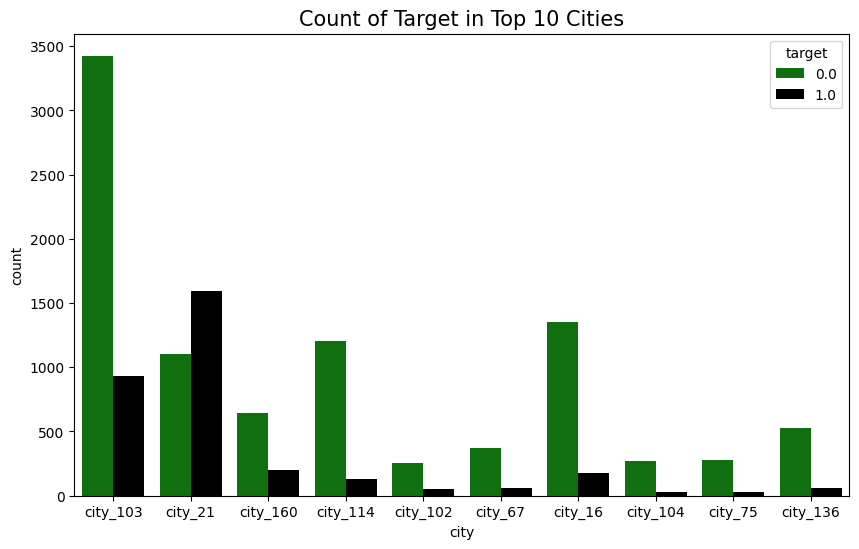

In [ ]:
top_cities=hr['city'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 cities
filtered_hr=hr[hr['city'].isin(top_cities)]

#The .isin() method is a Pandas method that checks whether each element in the Series is contained in the specified list, array, or another Series.

# Create the countplot with the filtered DataFrame
plt.figure(figsize=(10,6))
sns.countplot(x=filtered_hr['city'],palette=['g','k'],hue=filtered_hr['target'])
plt.title('Count of Target in Top 10 Cities',fontsize=15)


*  city has 123 unique value so we need to remove that,befor that we make sure that it has no relation with target.

In [ ]:
hr.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level             int64
major_discipline           object
experience                float64
company_size                int64
company_type               object
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
hr['city']=la.fit_transform(hr['city'])

In [ ]:
# hr.head(10)

* Now we are going to check the outliers in the numericalvalue

(array([5775., 1789.,  933., 2071., 1275., 3410.,  779., 1133., 1159.,
         834.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

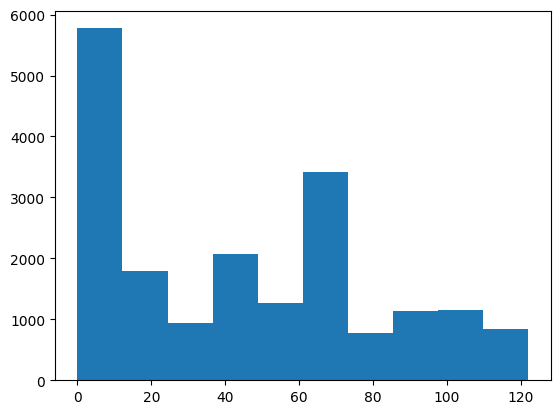

In [ ]:
plt.hist(x=hr['city'])

<Axes: xlabel='city'>

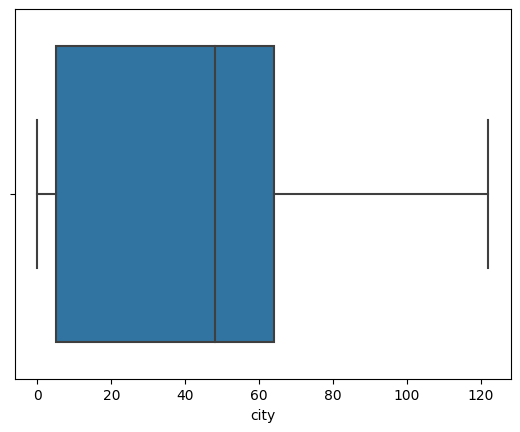

In [ ]:
sns.boxplot(x=hr['city'])

* There is no outliers in the 'city'

<Axes: >

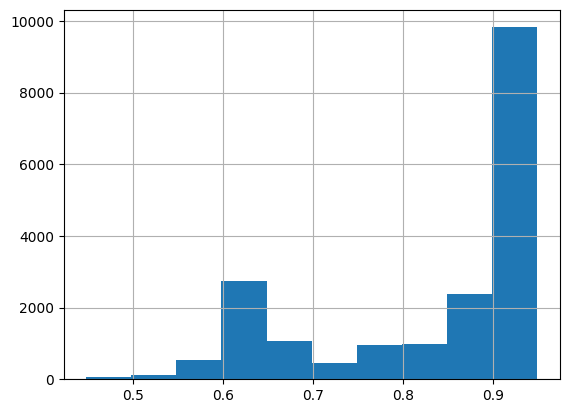

In [ ]:
hr['city_development_index'].hist()

* most of the employees come from cities with higher development index - equal or over 0.9
* there is also a representative category of employees that come from cities with lower development index - between 0.6 and -0.7

<Axes: xlabel='city_development_index'>

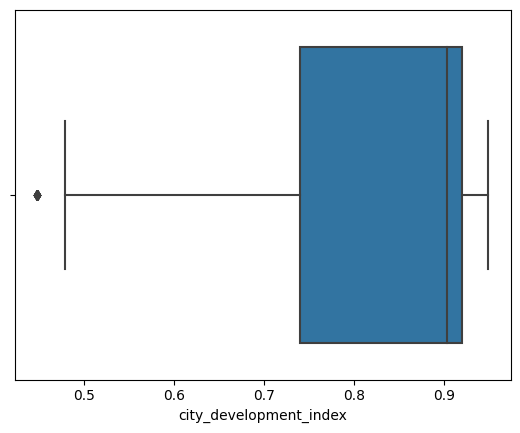

In [ ]:
sns.boxplot(x=hr['city_development_index'])

<Axes: >

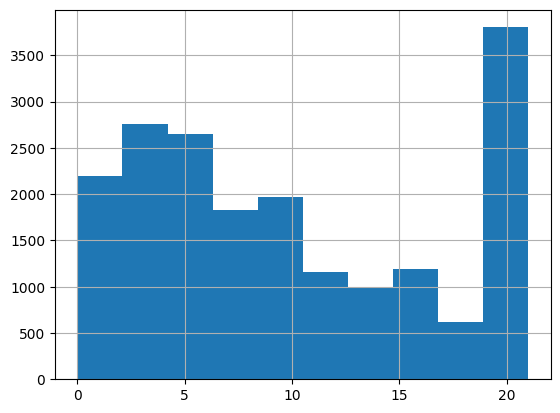

In [ ]:
hr['experience'].hist()

* There are pepole who has different experience.

<Axes: xlabel='experience'>

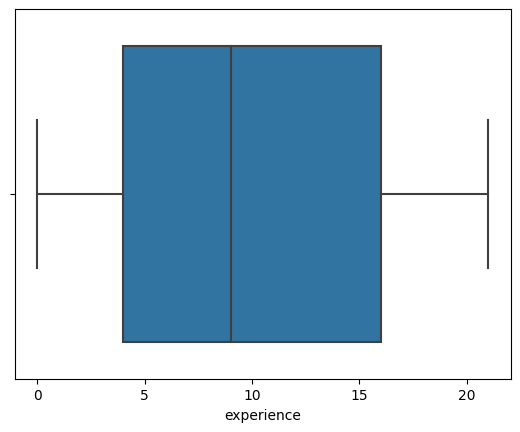

In [ ]:
sns.boxplot(x=hr['experience'])

* No outlier in experience also

<Axes: >

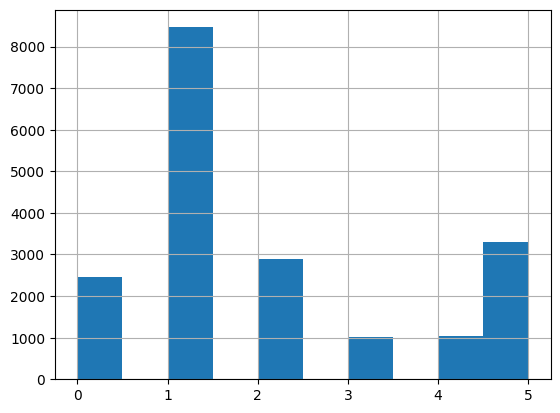

In [ ]:
hr['last_new_job'].hist()

<Axes: xlabel='last_new_job'>

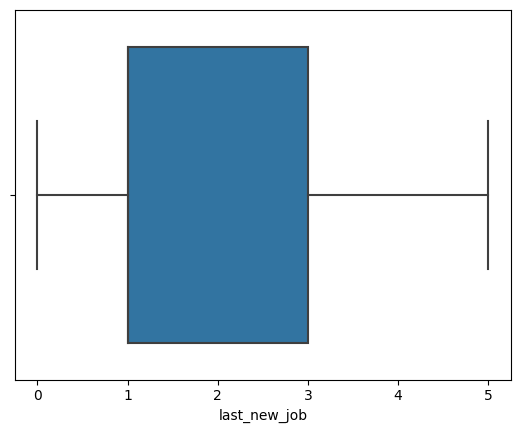

In [ ]:
sns.boxplot(x=hr['last_new_job'])

* no outliers in 'last_new_job'

(array([7262., 5169., 2897., 1564., 1066.,  398.,  314.,  166.,  133.,
         189.]),
 array([  1. ,  34.5,  68. , 101.5, 135. , 168.5, 202. , 235.5, 269. ,
        302.5, 336. ]),
 <BarContainer object of 10 artists>)

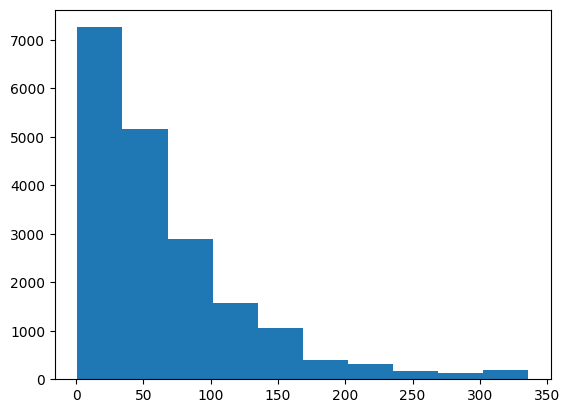

In [ ]:
plt.hist(x=hr['training_hours'])

* most of the employees attended between 0-100 training hours

<Axes: xlabel='training_hours'>

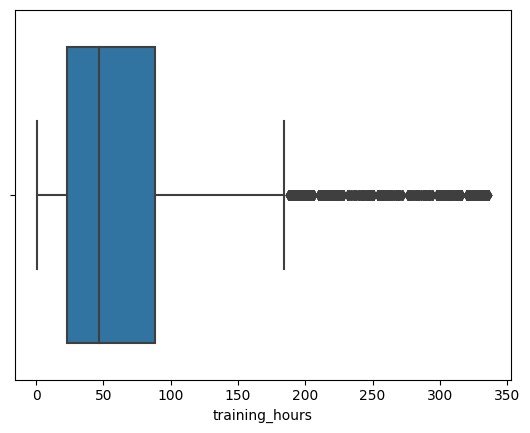

In [ ]:
sns.boxplot(x=hr['training_hours'])

* To find the number of outliers in training_hours and city_development_index

In [ ]:
def detect_outliers_iqr(data):
    q1=np.percentile(data, 25)
    q3=np.percentile(data, 75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=np.where((data<lower_bound)|(data>upper_bound))[0]
    return outliers

outliers_iqr=detect_outliers_iqr(hr['training_hours'])
num_outliers_iqr=len(outliers_iqr)
print("Number of outliers in training hours:",num_outliers_iqr)

outliers_iqr1=detect_outliers_iqr(hr['city_development_index'])
num_outliers_iqr1=len(outliers_iqr1)
print("Number of outliers city_development_index:",num_outliers_iqr1)



Number of outliers in training hours: 984
Number of outliers city_development_index: 17


* Here we can see that training hours has more outlier so we are going remove that

In [ ]:
q1=hr['training_hours'].quantile(.25)
q3=hr['training_hours'].quantile(.75)
iqr=q3-q1
lower=q1-(iqr*1.5)
upper=q3+(iqr*1.5)
hr=hr.loc[(hr['training_hours']>=lower)&(hr['training_hours']<=upper)]
hr.reset_index(drop=True,inplace=True)
hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,Male,Has relevent experience,no_enrollment,2,STEM,21.0,74,Pvt Ltd,1.0,36,1.0
1,29725,77,0.776,Male,No relevent experience,no_enrollment,2,STEM,15.0,74,Pvt Ltd,5.0,47,0.0
2,11561,64,0.624,Male,No relevent experience,Full time course,2,STEM,5.0,74,Pvt Ltd,0.0,83,0.0
3,33241,14,0.789,Male,No relevent experience,no_enrollment,2,Business Degree,0.0,74,Pvt Ltd,0.0,52,1.0
4,666,50,0.767,Male,Has relevent experience,no_enrollment,3,STEM,21.0,74,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,7386,55,0.878,Male,No relevent experience,no_enrollment,2,Humanities,14.0,74,Pvt Ltd,1.0,42,1.0
18170,31398,5,0.920,Male,Has relevent experience,no_enrollment,2,STEM,14.0,74,Pvt Ltd,4.0,52,1.0
18171,24576,5,0.920,Male,Has relevent experience,no_enrollment,2,STEM,21.0,74,Pvt Ltd,4.0,44,0.0
18172,5756,94,0.802,Male,Has relevent experience,no_enrollment,1,STEM,0.0,749,Pvt Ltd,2.0,97,0.0


* To select columns for model creation

<ipython-input-81-2a025addf06e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

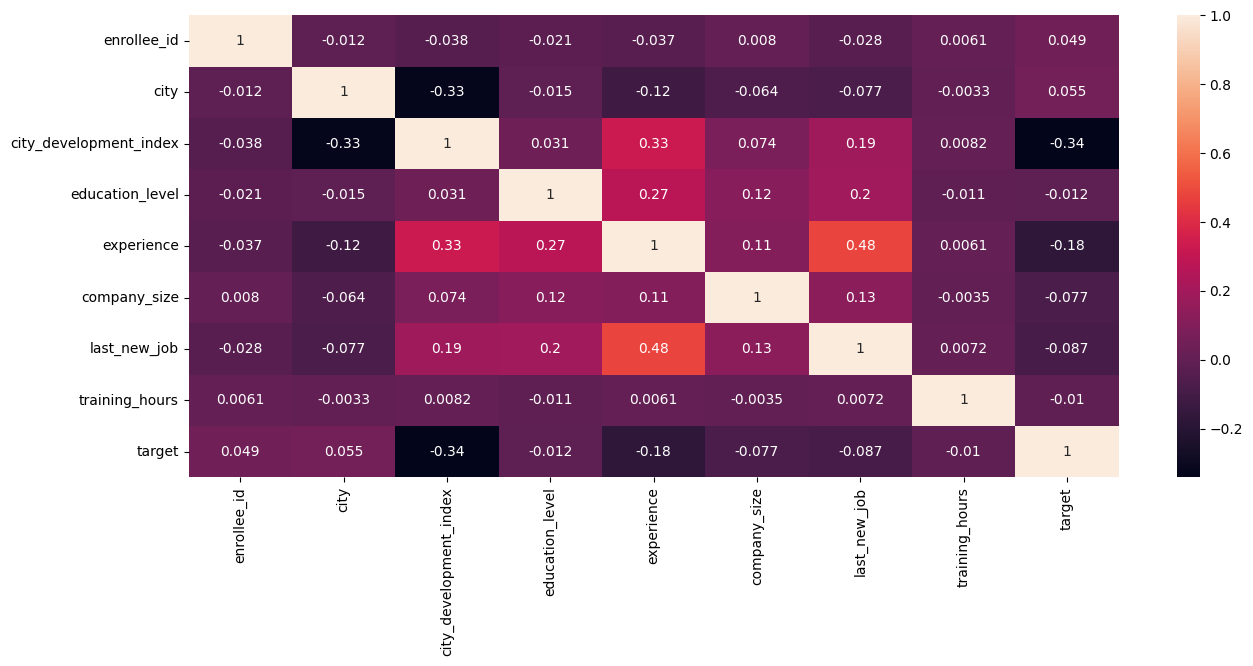

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(hr.corr(),annot=True)

* Here we dont need enrolled_id and city and but other all are negatively correlated.so we can't remove the columns.
* we remove city bcz it has weak positive correlation

* for categorical columns we are going to do chi square test.

we know that if input and output are in categorical columns then we use **chi2** test

In [ ]:
fs=hr[['gender','relevent_experience','enrolled_university','major_discipline','company_type']]
fs

,gender,relevent_experience,enrolled_university,major_discipline,company_type
0,Male,Has relevent experience,no_enrollment,STEM,Pvt Ltd
1,Male,No relevent experience,no_enrollment,STEM,Pvt Ltd
2,Male,No relevent experience,Full time course,STEM,Pvt Ltd
3,Male,No relevent experience,no_enrollment,Business Degree,Pvt Ltd
4,Male,Has relevent experience,no_enrollment,STEM,Funded Startup
...,...,...,...,...,...
18169,Male,No relevent experience,no_enrollment,Humanities,Pvt Ltd
18170,Male,Has relevent experience,no_enrollment,STEM,Pvt Ltd
18171,Male,Has relevent experience,no_enrollment,STEM,Pvt Ltd
18172,Male,Has relevent experience,no_enrollment,STEM,Pvt Ltd


In [ ]:
for i in fs.columns:
  fs[i]=la.fit_transform(fs[i])
fs

<ipython-input-83-95883fb1f723>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-95883fb1f723>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-95883fb1f723>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-95883fb

,gender,relevent_experience,enrolled_university,major_discipline,company_type
0,1,0,2,5,5
1,1,1,2,5,5
2,1,1,0,5,5
3,1,1,2,1,5
4,1,0,2,5,1
...,...,...,...,...,...
18169,1,1,2,2,5
18170,1,0,2,5,5
18171,1,0,2,5,5
18172,1,0,2,5,5


In [ ]:
y=hr['target'] #the target variable is in y.

In [ ]:
from sklearn.feature_selection import chi2
score=chi2(fs,y)
score

(array([1.20226874e-01, 2.30083814e+02, 1.71821997e+02, 6.66500571e-01,
        2.32403916e+01]),
 array([7.28788557e-01, 5.71563104e-52, 2.95962208e-39, 4.14274334e-01,
        1.42962916e-06]))

In [ ]:
f_score=pd.Series(score[0],index=fs.columns)
f_score.sort_values(ascending=False)

relevent_experience    230.083814
enrolled_university    171.821997
company_type            23.240392
major_discipline         0.666501
gender                   0.120227
dtype: float64

* need columns which has p-value<=0.05

*  we select columns where f value is higher and p_value is low than .05



In [ ]:
p_value=pd.Series(score[1],index=fs.columns)
p_value.sort_values(ascending=False)

gender                 7.287886e-01
major_discipline       4.142743e-01
company_type           1.429629e-06
enrolled_university    2.959622e-39
relevent_experience    5.715631e-52
dtype: float64

*     Null Hypothesis:
There is no association or relationship between the two categorical variables.

* here gender and major_discipline fail to reject the null hypothesis.so there is no significant association.


<BarContainer object of 5 artists>

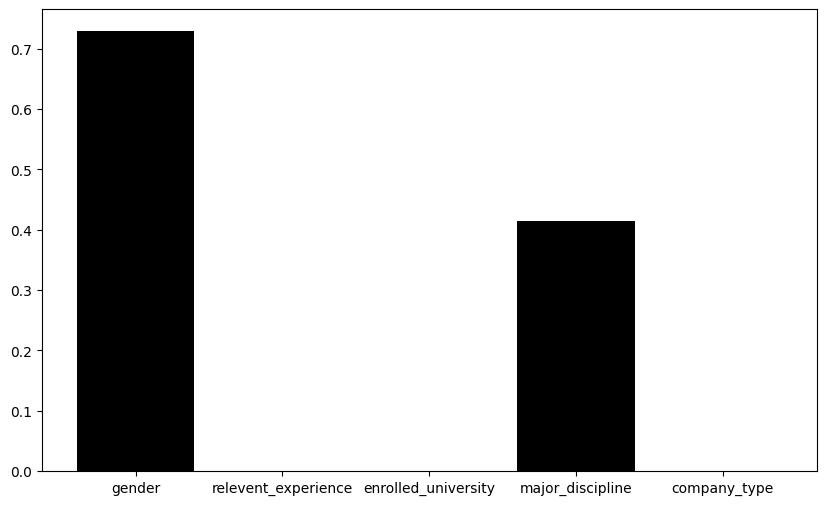

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(p_value.index,p_value,color='k')

* so we remove gender and major_discipline

In [ ]:
hr.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level             int64
major_discipline           object
experience                float64
company_size                int64
company_type               object
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [ ]:
hr1=hr.drop(['enrollee_id','city','gender','major_discipline'],axis=1)
hr1

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,2,21.0,74,Pvt Ltd,1.0,36,1.0
1,0.776,No relevent experience,no_enrollment,2,15.0,74,Pvt Ltd,5.0,47,0.0
2,0.624,No relevent experience,Full time course,2,5.0,74,Pvt Ltd,0.0,83,0.0
3,0.789,No relevent experience,no_enrollment,2,0.0,74,Pvt Ltd,0.0,52,1.0
4,0.767,Has relevent experience,no_enrollment,3,21.0,74,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...
18169,0.878,No relevent experience,no_enrollment,2,14.0,74,Pvt Ltd,1.0,42,1.0
18170,0.920,Has relevent experience,no_enrollment,2,14.0,74,Pvt Ltd,4.0,52,1.0
18171,0.920,Has relevent experience,no_enrollment,2,21.0,74,Pvt Ltd,4.0,44,0.0
18172,0.802,Has relevent experience,no_enrollment,1,0.0,749,Pvt Ltd,2.0,97,0.0


* Here relevent_experience,enrolled_university and company_type are nomial data so we are going to do encoding (get_dummies)



In [ ]:
hr2=pd.get_dummies(hr1[['relevent_experience','enrolled_university','company_type']],drop_first=True)
hr2

,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1
4,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
18169,1,0,1,0,0,0,0,1
18170,0,0,1,0,0,0,0,1
18171,0,0,1,0,0,0,0,1
18172,0,0,1,0,0,0,0,1


In [ ]:
hr=pd.concat([hr1,hr2],axis=1)
hr

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,Has relevent experience,no_enrollment,2,21.0,74,Pvt Ltd,1.0,36,1.0,0,0,1,0,0,0,0,1
1,0.776,No relevent experience,no_enrollment,2,15.0,74,Pvt Ltd,5.0,47,0.0,1,0,1,0,0,0,0,1
2,0.624,No relevent experience,Full time course,2,5.0,74,Pvt Ltd,0.0,83,0.0,1,0,0,0,0,0,0,1
3,0.789,No relevent experience,no_enrollment,2,0.0,74,Pvt Ltd,0.0,52,1.0,1,0,1,0,0,0,0,1
4,0.767,Has relevent experience,no_enrollment,3,21.0,74,Funded Startup,4.0,8,0.0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,0.878,No relevent experience,no_enrollment,2,14.0,74,Pvt Ltd,1.0,42,1.0,1,0,1,0,0,0,0,1
18170,0.920,Has relevent experience,no_enrollment,2,14.0,74,Pvt Ltd,4.0,52,1.0,0,0,1,0,0,0,0,1
18171,0.920,Has relevent experience,no_enrollment,2,21.0,74,Pvt Ltd,4.0,44,0.0,0,0,1,0,0,0,0,1
18172,0.802,Has relevent experience,no_enrollment,1,0.0,749,Pvt Ltd,2.0,97,0.0,0,0,1,0,0,0,0,1


In [ ]:
hr=hr.drop(['relevent_experience','enrolled_university','company_type'],axis=1)
hr

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,2,21.0,74,1.0,36,1.0,0,0,1,0,0,0,0,1
1,0.776,2,15.0,74,5.0,47,0.0,1,0,1,0,0,0,0,1
2,0.624,2,5.0,74,0.0,83,0.0,1,0,0,0,0,0,0,1
3,0.789,2,0.0,74,0.0,52,1.0,1,0,1,0,0,0,0,1
4,0.767,3,21.0,74,4.0,8,0.0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,0.878,2,14.0,74,1.0,42,1.0,1,0,1,0,0,0,0,1
18170,0.920,2,14.0,74,4.0,52,1.0,0,0,1,0,0,0,0,1
18171,0.920,2,21.0,74,4.0,44,0.0,0,0,1,0,0,0,0,1
18172,0.802,1,0.0,749,2.0,97,0.0,0,0,1,0,0,0,0,1


In [ ]:
hr.dtypes

city_development_index                        float64
education_level                                 int64
experience                                    float64
company_size                                    int64
last_new_job                                  float64
training_hours                                  int64
target                                        float64
relevent_experience_No relevent experience      uint8
enrolled_university_Part time course            uint8
enrolled_university_no_enrollment               uint8
company_type_Funded Startup                     uint8
company_type_NGO                                uint8
company_type_Other                              uint8
company_type_Public Sector                      uint8
company_type_Pvt Ltd                            uint8
dtype: object

In [ ]:
hr['target'].value_counts()

0.0    13607
1.0     4567
Name: target, dtype: int64

* Dealing With Imbalanced Dataset:

 The dataset at hand is characterized by an imbalance, where the majority class (target = 0), indicating individuals not seeking a job change, constitutes approximately 75% of the cases. In contrast, the minority class (target = 1), signifying those actively looking for a job change, represents only around 25% of the instances.

* To tackle the imbalance issue and enhance the predictive power of our model, we turn to the *Synthetic Minority Over-sampling Technique (SMOTE)* algorithm. SMOTE addresses the challenge by oversampling the minority class, providing the model with a more balanced training set. This helps create a robust boundary, improving the model's ability to accurately identify and classify instances of the minority class.

**SMOTE stands for Synthetic Minority Over-sampling TEchniqe which creates a number of new observations within a range of known data to be added to the minority classes to balance the dataset. Moreover it prevents the duplication. New observations will not be identical to original ones.**

In [ ]:
x=hr.drop(['target'],axis=1).values
x

array([[ 0.92 ,  2.   , 21.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.776,  2.   , 15.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.624,  2.   ,  5.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [ 0.92 ,  2.   , 21.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.802,  1.   ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.855,  0.   ,  2.   , ...,  0.   ,  0.   ,  1.   ]])

In [ ]:
y=hr['target'].values
y

array([1., 0., 0., ..., 0., 0., 0.])

* instead of sampling x_train and y_train we are smoting x and y

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)

In [ ]:
x_resampled.shape,y_resampled.shape

((27214, 14), (27214,))

In [ ]:
# np.sum(Y) gives number of ones  np.sum(1-Y) gives number of zeros
np.sum(y),np.sum(1-y)

(4567.0, 13607.0)

* After smote

In [ ]:
np.sum(y_resampled),np.sum(1-y_resampled)

(13607.0, 13607.0)

* We can see now how the SMOTE have made balance between both classes

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=.30,random_state=42)
x_train

array([[0.92      , 1.        , 3.        , ..., 0.        , 0.        ,
        1.        ],
       [0.91719498, 2.        , 1.1335726 , ..., 0.        , 0.        ,
        1.        ],
       [0.85179915, 2.        , 1.16557088, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.926     , 1.        , 6.        , ..., 0.        , 0.        ,
        1.        ],
       [0.92      , 2.        , 3.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75946516, 2.09303209, 3.45348395, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.8952567 , -1.80895433, -0.96180473, ..., -0.0824044 ,
        -0.22759062,  0.43388788],
       [ 0.87333751, -0.20299546, -1.24042057, ..., -0.0824044 ,
        -0.22759062,  0.43388788],
       [ 0.3623174 , -0.20299546, -1.23564394, ..., -0.0824044 ,
        -0.22759062,  0.43388788],
       ...,
       [ 0.94214227, -1.80895433, -0.51397186, ..., -0.0824044 ,
        -0.22759062,  0.43388788],
       [ 0.8952567 , -0.20299546, -0.96180473, ..., -0.0824044 ,
        -0.22759062,  0.43388788],
       [-0.35920456, -0.05358975, -0.89410972, ..., -0.0824044 ,
        -0.22759062,  0.43388788]])

In [ ]:
y_train

array([0., 1., 1., ..., 0., 1., 1.])

**Model Creation**


* The specific choice between prioritizing precision or recall depends on the company's priorities and the costs associated with false positives and false negatives.**If reducing the cost and time associated with training is a primary concern, we might want to focus on precision. If ensuring that you identify as many candidates as possible who are likely to leave is crucial, then recall becomes more important**.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier()
bb=BernoulliNB()
sv=SVC()
log=LogisticRegression()
des=DecisionTreeClassifier()
ran=RandomForestClassifier()
lst=[knn,bb,sv,log,des,ran]

from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  # print(confusion_matrix(y_test,y_pred))
  # print('precision : ',precision_score(y_test,y_pred))
  # print('Recall : ',recall_score(y_test,y_pred))
  print('accuracy : ',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('--'*50)

KNeighborsClassifier()
accuracy :  0.7551745254133496
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      4050
         1.0       0.76      0.75      0.76      4115

    accuracy                           0.76      8165
   macro avg       0.76      0.76      0.76      8165
weighted avg       0.76      0.76      0.76      8165

----------------------------------------------------------------------------------------------------
BernoulliNB()
accuracy :  0.6698101653398653
              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66      4050
         1.0       0.67      0.68      0.67      4115

    accuracy                           0.67      8165
   macro avg       0.67      0.67      0.67      8165
weighted avg       0.67      0.67      0.67      8165

----------------------------------------------------------------------------------------------------
SVC()
accuracy :  0.7593386405388854
        

**now we need to improve the model so we use grid search cv.**

In [ ]:
from sklearn.model_selection import GridSearchCV
# for i in lst:
#   print(i,i.get_params())  #-->to get the default parameters used in model.

In [ ]:
knn_param_grid={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
knn_model=KNeighborsClassifier()
knn_grid_search=GridSearchCV(knn_model,knn_param_grid,cv=10,scoring='precision')
knn_grid_search.fit(x_train,y_train)
knn_best_model=knn_grid_search.best_estimator_
y_pred_knn=knn_best_model.predict(x_test)
class_knn=classification_report(y_test,y_pred_knn)
print("Best parameters for KNN:",knn_grid_search.best_params_)
print(class_knn)


Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      4050
         1.0       0.78      0.78      0.78      4115

    accuracy                           0.78      8165
   macro avg       0.78      0.78      0.78      8165
weighted avg       0.78      0.78      0.78      8165



In [ ]:
naive_bayes_param_grid={'alpha':[0.0001,0.001,0.01,0.1,1,10,100],'binarize':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],'fit_prior': [True,False]}
naive_bayes_model=BernoulliNB()
naive_bayes_grid_search=GridSearchCV(naive_bayes_model,naive_bayes_param_grid,cv=10,scoring='precision')
naive_bayes_grid_search.fit(x_train,y_train)
naive_bayes_best_model=naive_bayes_grid_search.best_estimator_
y_pred_naive_bayes=naive_bayes_best_model.predict(x_test)
class_naive=classification_report(y_test,y_pred_naive_bayes)
print("Best parameters for Naive Bayes:",naive_bayes_grid_search.best_params_)
print(class_naive)

Best parameters for Naive Bayes: {'alpha': 100, 'binarize': 0.5, 'fit_prior': True}
              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67      4050
         1.0       0.68      0.70      0.69      4115

    accuracy                           0.68      8165
   macro avg       0.68      0.68      0.68      8165
weighted avg       0.68      0.68      0.68      8165



In [ ]:
# svm_param_grid ={'C':[0.25,0.5,0.75,1],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
# svm_model=SVC()
# svm_grid_search=GridSearchCV(svm_model,svm_param_grid,cv=10)
# svm_grid_search.fit(x_train,y_train)
# svm_best_model=svm_grid_search.best_estimator_
# y_pred_svm=svm_best_model.predict(x_test)
# class_svm=classification_report(y_test,y_pred_svm)
# print("Best parameters for SVM:",svm_grid_search.best_params_)
# print(class_svm)

In [ ]:
logistic_regression_param_grid={'C':[0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','saga']}
logistic_regression_model=LogisticRegression(max_iter=1000)
logistic_regression_grid_search=GridSearchCV(logistic_regression_model,logistic_regression_param_grid,cv=10,scoring='precision')
logistic_regression_grid_search.fit(x_train,y_train)
logistic_regression_best_model=logistic_regression_grid_search.best_estimator_
y_pred_logistic_regression=logistic_regression_best_model.predict(x_test)
class_log=classification_report(y_test,y_pred_logistic_regression)
print("Best parameters for Logistic Regression:",logistic_regression_grid_search.best_params_)
print(class_log)

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71      4050
         1.0       0.72      0.66      0.69      4115

    accuracy                           0.70      8165
   macro avg       0.70      0.70      0.70      8165
weighted avg       0.70      0.70      0.70      8165



In [ ]:
decision_tree_param_grid={'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'criterion':['gini','entropy']},
decision_tree_model=DecisionTreeClassifier()
decision_tree_grid_search=GridSearchCV(decision_tree_model,decision_tree_param_grid,cv=10)
decision_tree_grid_search.fit(x_train,y_train)
decision_tree_best_model=decision_tree_grid_search.best_estimator_
y_pred_decision_tree=decision_tree_best_model.predict(x_test)
class_decision=classification_report(y_test,y_pred_decision_tree)
print("Best parameters for Decision Tree:",decision_tree_grid_search.best_params_)
print(class_decision)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      4050
         1.0       0.80      0.77      0.79      4115

    accuracy                           0.79      8165
   macro avg       0.79      0.79      0.79      8165
weighted avg       0.79      0.79      0.79      8165



In [ ]:
random_parameters = {'n_estimators':[10,20,30,40,50,100],'criterion':['gini','entropy']}
random_model=RandomForestClassifier()
random_grid_search = GridSearchCV(random_model,random_parameters,cv=5)
random_grid_search.fit(x_train,y_train)
random_best_model=random_grid_search.best_estimator_
y_pred_random =random_best_model.predict(x_test)
class_random=classification_report(y_test,y_pred_random)
print("Best parameters for random_forest:",random_grid_search.best_params_)
print(class_random)

Best parameters for random_forest: {'criterion': 'entropy', 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      4050
         1.0       0.85      0.81      0.83      4115

    accuracy                           0.83      8165
   macro avg       0.83      0.83      0.83      8165
weighted avg       0.83      0.83      0.83      8165



* we are using Random Forest for prediction.

In [ ]:
pred=[y_pred_knn,y_pred_naive_bayes,y_pred_logistic_regression,y_pred_decision_tree,y_pred_random]
for i in pred:
  print(confusion_matrix(y_test,i))
  print('--'*8)

[[3128  922]
 [ 913 3202]]
----------------
[[2660 1390]
 [1218 2897]]
----------------
[[2995 1055]
 [1419 2696]]
----------------
[[3266  784]
 [ 934 3181]]
----------------
[[3479  571]
 [ 786 3329]]
----------------


**Now we are going to collect the details from user and predict if the candidate is going to change the company or stay in the compamy.**

In [ ]:
id=input('• ENTER ENROLLED ID : ')
city=input('• CITY : ')
cdi=float(input('• ENTER CITY_DEVELOPMENT_INDEX :'))
gender=input('• CHOOSE YOUR GENDER : \n'
                '1.MALE 2.FEMALE 3.OTHER \n'
                  ' ')
rex=int(input('• DO YOU HAVE ANY RELEVENT_EXPERIENCE :\n'
              '1.YES  2.NO \n'
              ' '))
univ=int(input('• WHAT IS YOUR TYPE OF ENROLLED_UNIVERSITY : \n'
               '1.Full time2.Part time 3.Not enrolled  \n'
               ' '))
ed=int(input('• CHOOSE YOUR EDUCATION :\n'
           '0.pre_school 1.High school 2.Graduate 3.Masters 4. PhD \n'
             ' '))
ma_di=input('• CHOOSE YOUR MAJOR DISCIPLINE :\n'
            '1.STEM 2.Humanities 3.Other 4.Business Degree \n'
                '5.Arts    6.No Major  \n'
                 ' ')
exp=float(input('• ENTER EXPERIENCE IN YEARS :  '))

company_size_mapping = {1:(50+99)//2,2:(100+500)//2,3:10000,4:(10+49)//2,5:(1000+4999)//2,6:9,7:(500+999)//2,8:(5000+9999)//2}
com_size=int(input('• SELECT YOUR COMPANY SIZE :\n'
                   '1.50-99  2.100-500 3.10000+ 4.10/49 5.1000-4999\n'
                   '    6.<10  7.500-999 8.5000-9999\n'
                   ' '))
size=company_size_mapping.get(com_size)
com_type=int(input('• SELECT YOUR COMPANY :\n'
                   '1.Early Stage Startup 2.Funded Startup  3.NGO  4.Other\n'
                   '    5.Public Sector  6.Pvt Ltd  \n'
                   ' '))
lnj=int(input('• ENTER THE YEAR OF DIFFERENCE BETWEEN LAST JOB AND NEW JOB : '))
th=float(input('• ENTER YOUR TRAING HOURS : '))


lst=[0 for i in range(1,15)]
lst[0:6]=cdi,ed,exp,size,lnj,th
if rex==2:
    lst[6]=1
if univ==2:
    lst[7]=1
elif univ==3:
    lst[8]=1
if com_type==2:
    lst[9]=1
elif com_type==3:
    lst[10]=1
elif com_type==4:
    lst[11]=1
elif com_type==5:
    lst[12]=1
elif com_type==6:
    lst[13]=1
print(lst)
print('--'*10)
cv=random_best_model.predict(sc.transform([lst]))
if cv==1:
  print(id,'IS LOOKING FOR A JOB CHANGE.')
else:
  print(id,'IS NOT GOING TO CHANGE THE JOB')

• ENTER ENROLLED ID : 123
• CITY : CITY_12
• ENTER CITY_DEVELOPMENT_INDEX :.326
• CHOOSE YOUR GENDER : 
1.MALE 2.FEMALE 3.OTHER 
 2
• DO YOU HAVE ANY RELEVENT_EXPERIENCE :
1.YES  2.NO 
 1
• WHAT IS YOUR TYPE OF ENROLLED_UNIVERSITY : 
1.Full time2.Part time 3.Not enrolled  
 1
• CHOOSE YOUR EDUCATION :
0.pre_school 1.High school 2.Graduate 3.Masters 4. PhD 
 3
• CHOOSE YOUR MAJOR DISCIPLINE :
1.STEM 2.Humanities 3.Other 4.Business Degree 
5.Arts    6.No Major  
 5
• ENTER EXPERIENCE IN YEARS :  1
• SELECT YOUR COMPANY SIZE :
1.50-99  2.100-500 3.10000+ 4.10/49 5.1000-4999
    6.<10  7.500-999 8.5000-9999
 5
• SELECT YOUR COMPANY :
1.Early Stage Startup 2.Funded Startup  3.NGO  4.Other
    5.Public Sector  6.Pvt Ltd  
 1
• ENTER THE YEAR OF DIFFERENCE BETWEEN LAST JOB AND NEW JOB : 2
• ENTER YOUR TRAING HOURS : 52
[0.326, 3, 1.0, 2999, 2, 52.0, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------
123 IS LOOKING FOR A JOB CHANGE.
